In [1]:
import math
import arrow
import ipynb 
import os.path
import json
import pickle
import sys
import random
import operator

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import numpy as np

from dotenv import load_dotenv
from networkx.algorithms import bipartite
from importlib import reload
from typing import List


In [2]:
# import functions from py file 

import functions.fun
reload(functions.fun)
from functions.fun import CB_data_cleaning, df_from_api_CB, extract_nodes, extract_data_from_column
from functions.fun import nx_dip_graph_from_pandas, plot_bipartite_graph, filter_dict, check_desc
from functions.fun import extract_classes_company_tech, degree_bip, insert_data_classes

In [3]:
# import classes 

import classes
reload(classes)

<module 'classes' from '/home/anita.mezzetti/bipartite_network/classes.py'>

## Update data

In [4]:
name_file_com = 'savings/classes/dict_companies_cybersecurity_10.pickle'
name_file_tech = 'savings/classes/dict_companies_cybersecurity_10.pickle'
name_file_graph = 'savings/networks/cybersecurity_comp_10_tech_26.gpickle'
name_M = 'savings/M/cybersecurity_comp_10_tech_26.npy'
flag_cybersecurity = True

In [5]:
with open(name_file_com, 'rb') as f:
    dict_companies = pickle.load(f)
    
with open(name_file_tech, 'rb') as f:
    dict_tech = pickle.load(f)

B = nx.read_gpickle(name_file_graph)

with open(name_M, 'rb') as f:
    M = np.load(f)

In [7]:
lenght = len(dict_companies)

### Plots <a class="anchor" id="plot"></a>

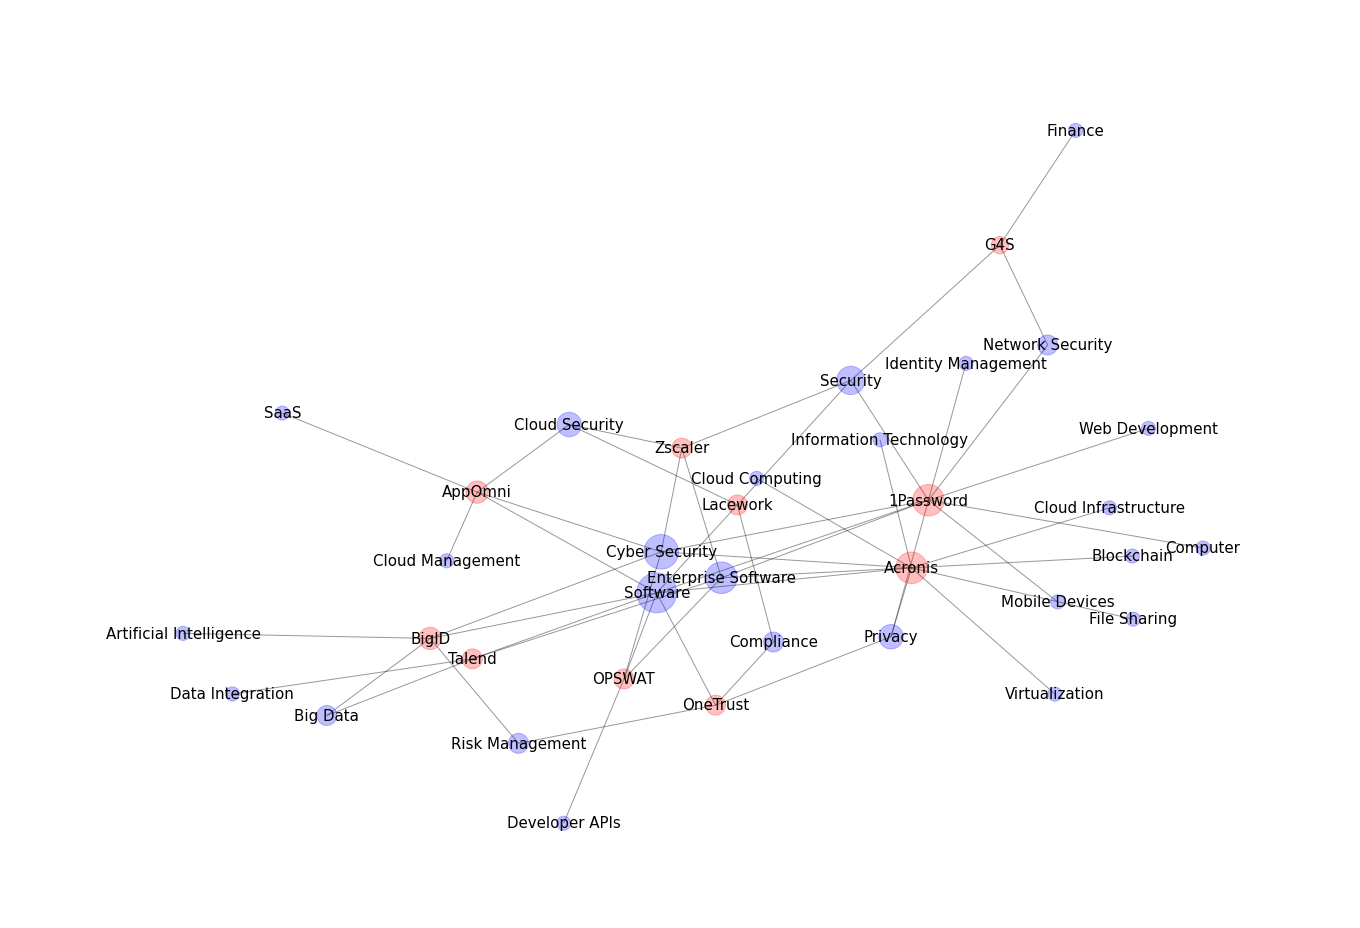

In [9]:
plot_bipartite_graph(B, small_degree=True)
plt.savefig(f'plots/plots_net/network_all_{lenght}.pdf')
plt.savefig(f'plots/plots_net/network_all_{lenght}.png')

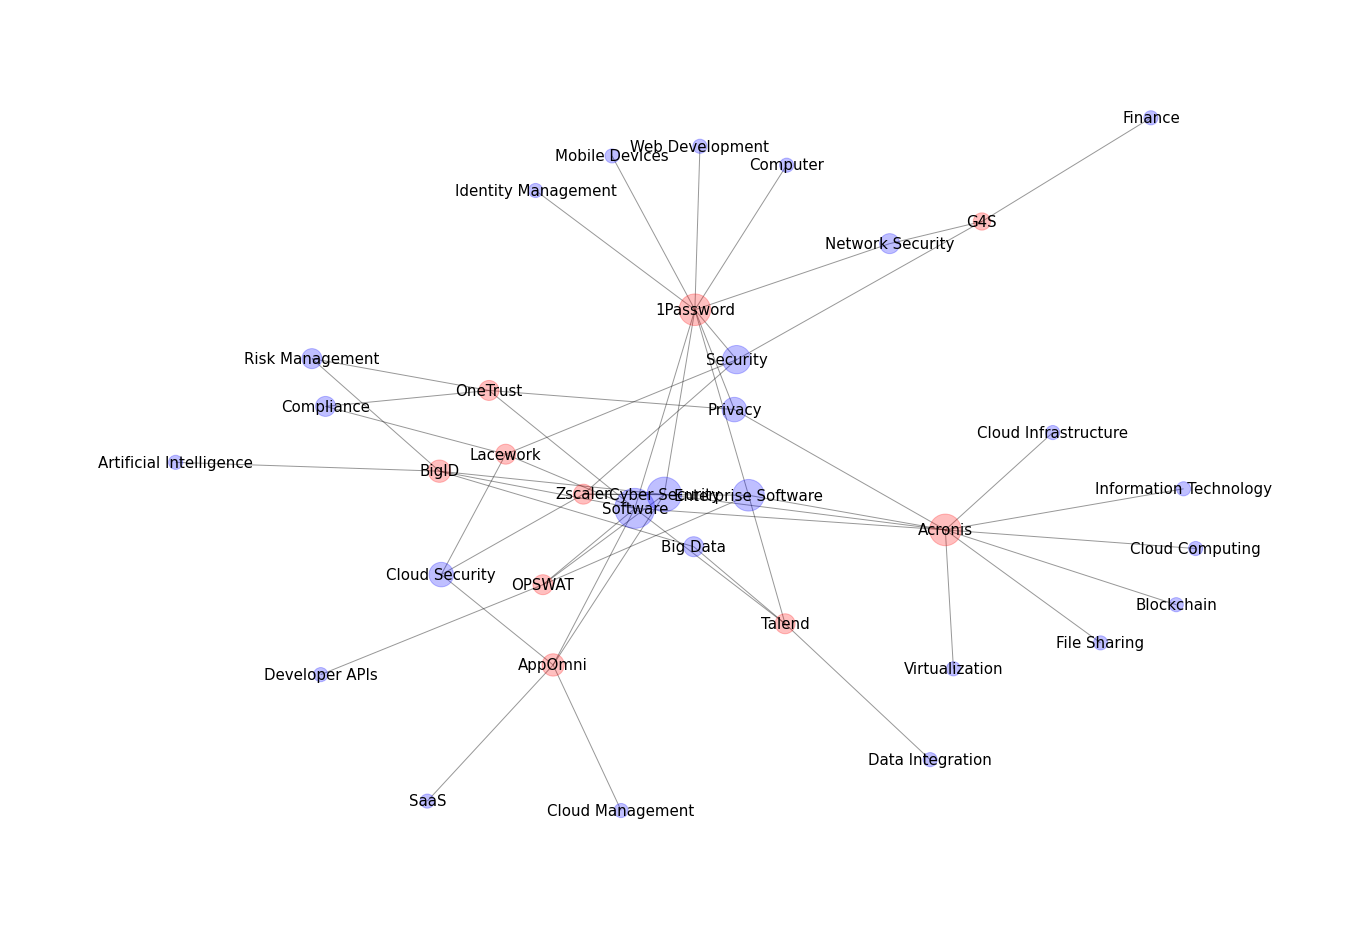

In [10]:
plot_bipartite_graph(B, small_degree=True, circular=True)
plt.savefig(f'plots/plots_net/network_all_circ_{lenght}.pdf')
plt.savefig(f'plots/plots_net/network_all_circ_{lenght}.png')

In [11]:
percentagee = 57

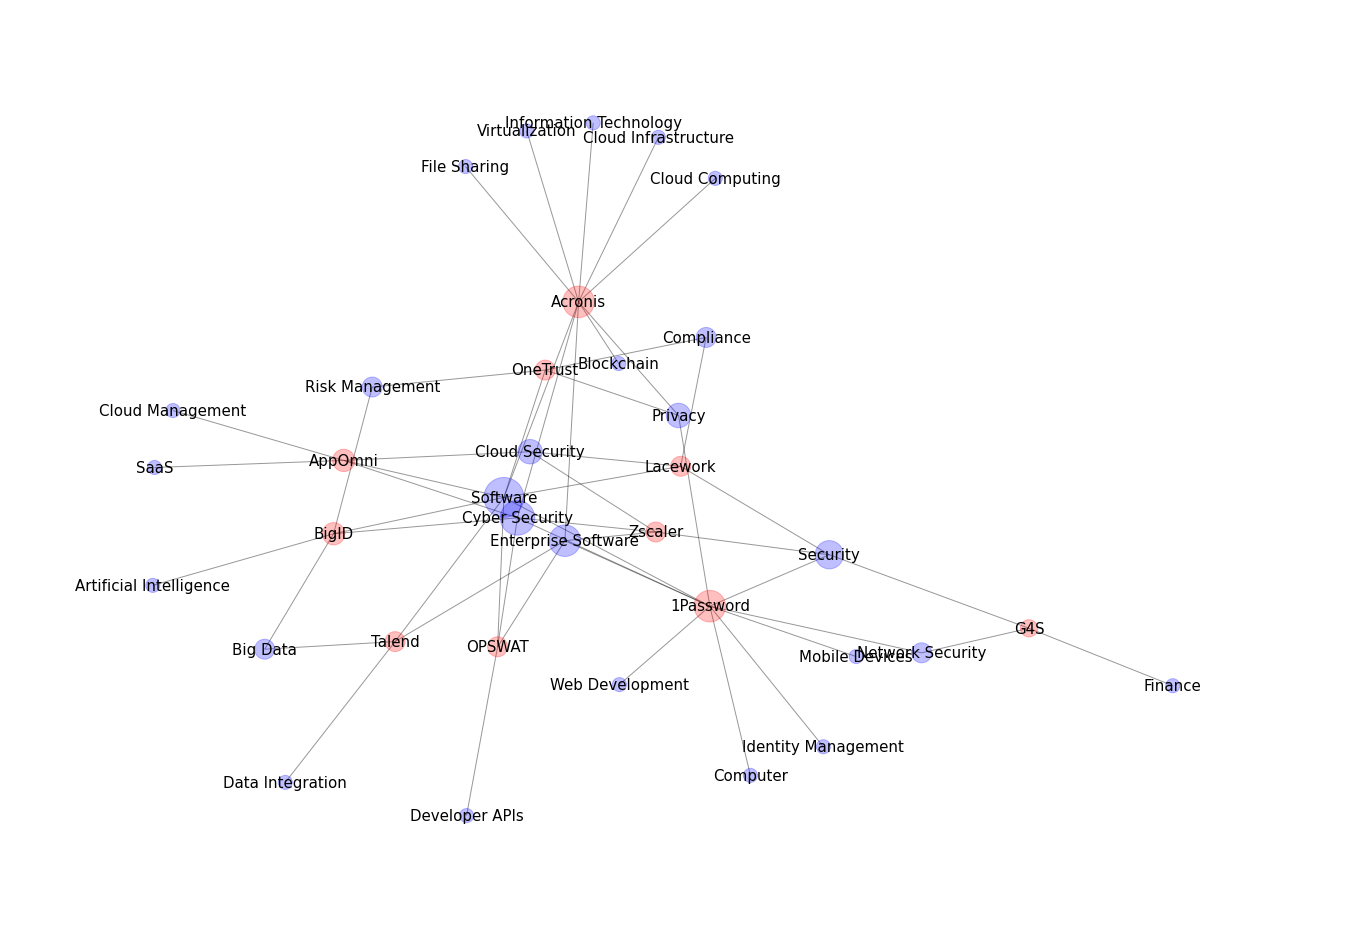

In [12]:
pos2 = plot_bipartite_graph(B, small_degree=False, percentage=percentagee)
plt.savefig(f'plots/plots_net/network_{str(percentagee)}_{lenght}.pdf')
plt.savefig(f'plots/plots_net/network_{str(percentagee)}_{lenght}.png')

### Change position of some specific nodes

This section is valuable only when we work with a lot of nodes and the previous plots aren't easily readable.

It must be changed everytime accoridng to the specific needs of each network. It is only an aesthetics part, so if it doesn't work it's not a problem :)

In [14]:
honey = [
    'Market Research',
    'Honeywell International',
    'E-Learning',
    'EdTech',
    'Electronics',
    'Service Industry',
    'Aerospace',
    'Manufacturing',
    'Innovation Management'
]

In [15]:
for h in honey:
    position = pos2[h]
    position[1] = position[1]- 0.2
    pos2[h] = position

KeyError: 'Market Research'

In [20]:
mapping = {
    'Swiss Security Solutions LLC': "Swiss Security Solutions", 
    'fitchain': "Fitchain",
    'Cloud Computing':'Cloud \n Computing',
    'Law Enforcement':'Law \n Enforcement',
    'Physical Security':'Physical \n Security',
    'National Security':'National \n Security',
    'Management Consulting': 'Management \n Consulting'
}

B = nx.relabel_nodes(B, mapping)

In [21]:
pos2['Management \n Consulting'] = pos3['Management Consulting']
pos2.pop('Management Consulting')

KeyError: 'Management Consulting'

In [22]:
h = 'Law \n Enforcement'
position = pos2[h]
position[0] = position[0] + 0.05
pos2[h] = position

KeyError: 'Law \n Enforcement'

In [23]:
plot_bipartite_graph1(pos2, B, small_degree=False, percentage=percentagee)

plt.savefig(f'plots_net/network_finished.pdf')
plt.savefig(f'plots_net/network_finished.png')

NameError: name 'plot_bipartite_graph1' is not defined

In [24]:
def plot_bipartite_graph1(pos, G, small_degree=True, percentage=10, circular=False):

    set1 = [node for node in G.nodes() if G.nodes[node]['bipartite']==0]
    set2 = [node for node in G.nodes() if G.nodes[node]['bipartite']==1]

    if small_degree == False: # don't plot nodes with low number of edges
        to_delete = filter_dict(G, percentage, set1, set2)

        G_filtered = G.copy()
        G_filtered.remove_nodes_from(to_delete)
        G_filtered.remove_nodes_from(list(nx.isolates(G_filtered)))

        plot_bipartite_graph1(pos, G_filtered, small_degree=True, percentage=percentage, circular=circular)
        
        return

    if len(set1)>=20:
        plt.figure(1,figsize=(25,15))
    else: 
        plt.figure(1,figsize=(19,13)) 
    
    plt.axis('off')



    if "Social Recruiting" in G.nodes():
        G.remove_node("Social Recruiting")
    if "Mobile" in G.nodes():
        G.remove_node("Mobile")
    if "Sales" in G.nodes():
        G.remove_node("Sales")
    if "Analytics" in G.nodes():
        G.remove_node("Analytics")
    if "Government" in G.nodes():
        G.remove_node("Government")
    if "Education" in G.nodes():
        G.remove_node("Education")
    if "Personalization" in G.nodes():
        G.remove_node("Personalization")
    if "Military" in G.nodes():
        G.remove_node("Military")

    G.remove_node("Virtualization")

    # company, value = bipartite.sets(G)
    # subsituted with:
    company = [node for node in G.nodes() if G.nodes[node]['bipartite']==0]
    value = [node for node in G.nodes() if G.nodes[node]['bipartite']==1]

    # calculate degree centrality
    companyDegree = nx.degree(G, company) 
    valueDegree = nx.degree(G, value)


    # nodes
    nx.draw_networkx_nodes(G,
                           pos,
                           nodelist=company,
                           node_color='r',
                           node_size=[v * 100 for v in dict(companyDegree).values()],
                           alpha=0.25,
                           label=company)

    nx.draw_networkx_nodes(G,
                           pos,
                           nodelist=value,
                           node_color='b',
                           node_size=[v * 200 for v in dict(valueDegree).values()],
                           alpha=0.25,
                           label=value)

    nx.draw_networkx_labels(G, pos, {n: n for n in company}, font_size=20)
    nx.draw_networkx_labels(G, pos, {n: n for n in value}, font_size=20)

    # edges
    nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.4)


    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    plt.tight_layout()

    return 


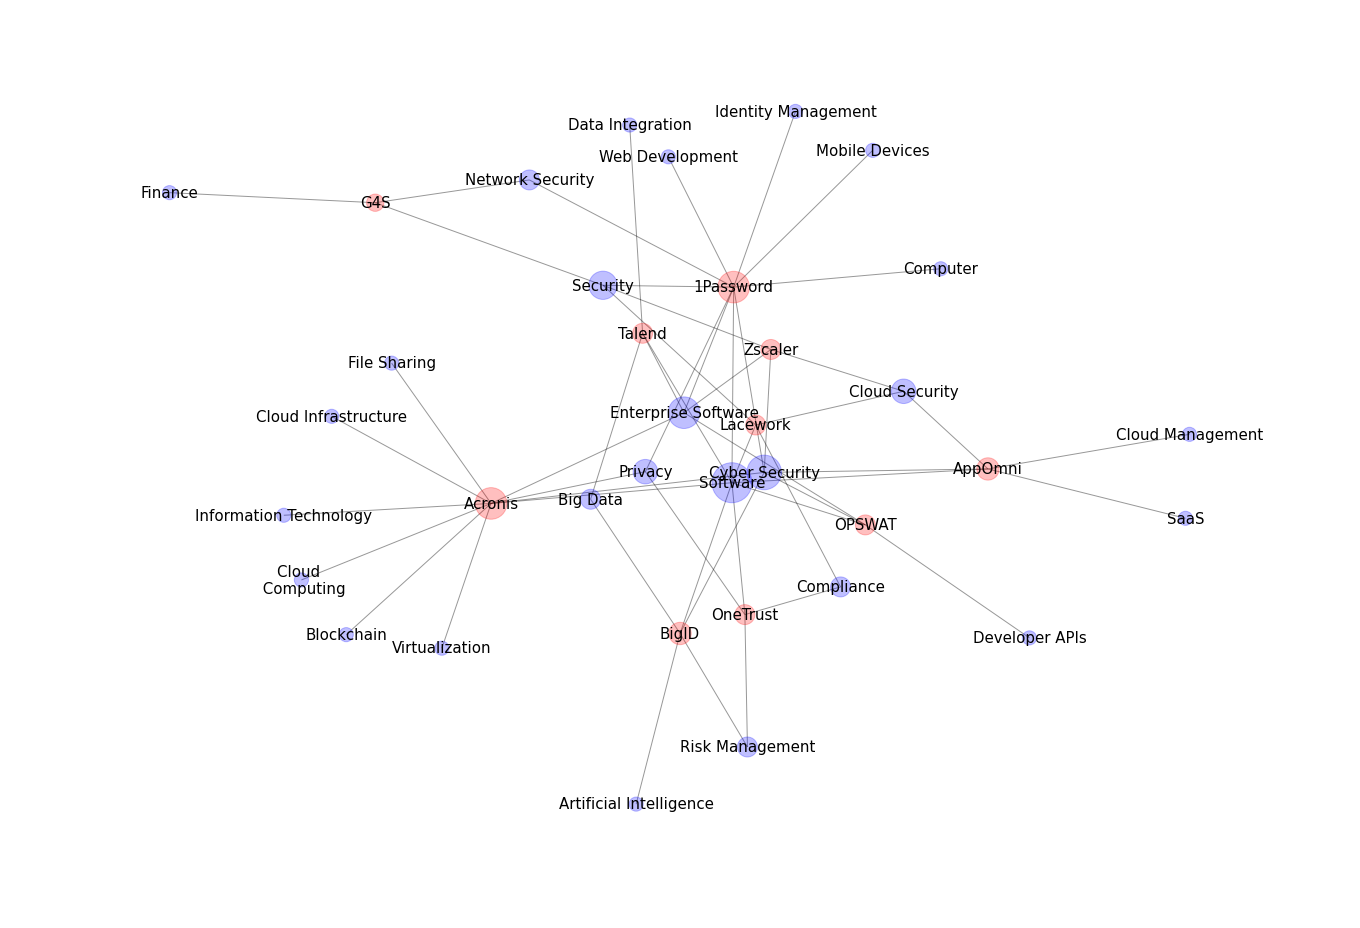

In [27]:
plot_bipartite_graph(B, small_degree=False, circular=True, percentage=percentagee)
plt.savefig(f'plots_net/network_{str(percentagee)}_circ_{lenght}.pdf')
plt.savefig(f'plots_net/network_{str(percentagee)}_circ_{lenght}.png')

In [28]:
[company_degree, tech_degree] = degree_bip(B)

In [29]:
print(f"We have {len(company_degree)} companies and {len(tech_degree)} technologies")

We have 10 companies and 26 technologies


In [30]:
# sort by value
company_degree_sorted = dict(sorted(company_degree.items(), key=lambda item: item[1], reverse=True))
tech_degree_sorted = dict(sorted(tech_degree.items(), key=lambda item: item[1], reverse=True))

# only maximum 
num_max = 10


# check we don't go out of range
if len(company_degree)<num_max or len(tech_degree)<num_max:
    minn = min(len(company_degree), len(tech_degree))
    num_max = minn-1

def limit_value(x, num_max_perc):
    return list(x.values())[num_max_perc]

company_degree_max = {k: company_degree_sorted[k] for k in list(company_degree_sorted.keys())[:num_max]}
tech_degree_max = {k: tech_degree_sorted[k] for k in list(tech_degree_sorted.keys())[:num_max]}


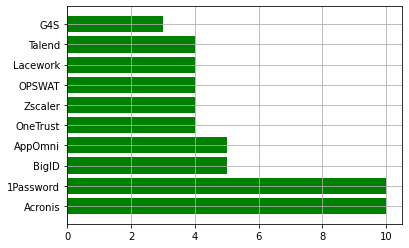

In [31]:
plt.barh(list(company_degree_max.keys()), company_degree_max.values(), color='g')
plt.grid(True)
plt.show()

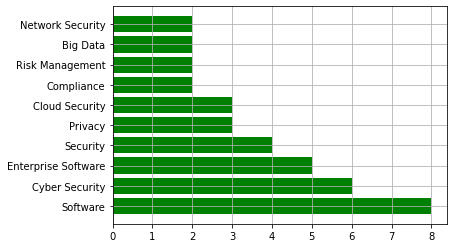

In [32]:
plt.barh(list(tech_degree_max.keys()), tech_degree_max.values(), color='g')
plt.grid(True)
plt.show()

In [33]:
# companies' degree 
dict_companies = insert_data_classes(dict_companies, dict(company_degree), 'degree')

In [34]:
# technologies' degree
dict_tech = insert_data_classes(dict_tech, dict(tech_degree), 'degree')

Error: try to add a feature for Compliance, which is not in class


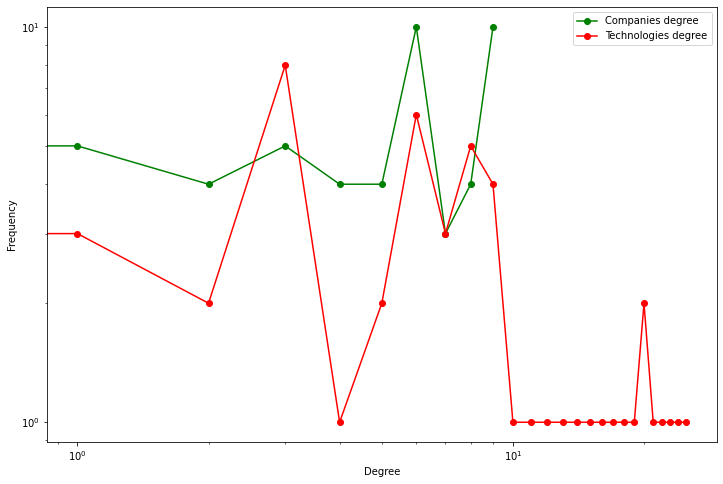

In [35]:
a = list(company_degree.values())
b = list(tech_degree.values())
degrees_a = range(len(a))
degrees_b = range(len(b))

m=0
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees_a[m:], a,'go-', label='Companies degree') 
plt.loglog(degrees_b[m:], b,'ro-', label='Technologies degree') 
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

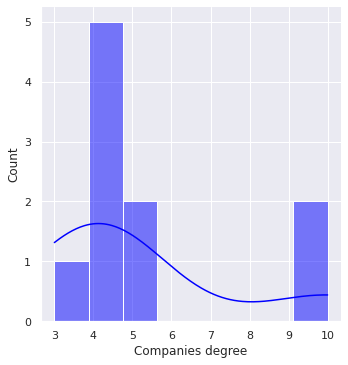

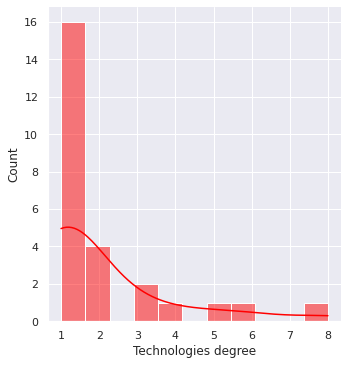

In [36]:
sns.set(style="darkgrid")
sns.displot(a, color="blue", label="Companies degree", kde=True)
plt.xlabel("Companies degree")
sns.displot(b, color="red", label="Technologies degree", kde=True)
plt.xlabel("Technologies degree")
plt.show()